# 🛳️ Titanic 생존 분석 캡스톤

In [630]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from pandas import crosstab

In [631]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [632]:
origin=load_data('titanic')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/kaggle/titanic.xlsx
[desc] 타이타닉호 침몰은 역사상 가장 악명 높은 난파 사고 중 하나입니다. 1912년 4월 15일, 첫 항해 중이던 타이타닉호는 빙산과 충돌하여 침몰했습니다. 당시 배에는 모든 승객과 승무원을 태울 수 있는 구명보트가 충분하지 않아 2,224명의 승객과 승무원 중 1,502명이 목숨을 잃었습니다. 생존에는 어느 정도 운이 작용했지만, 일부 집단은 다른 집단보다 생존 가능성이 더 높았던 것으로 보입니다. 이번 과제에서는 승객 데이터(예: 이름, 나이, 성별, 사회경제적 계층 등)를 사용하여 `어떤 유형의 사람들이 생존할 가능성이 더 높았을까?`라는 질문에 답하는 예측 모델을 구축해야 합니다. (출처: https://www.kaggle.com/datasets/yasserh/titanic-dataset)

변수명       설명
-----------  -------------------------------------------------------
PassengerId  탑승객의 ID(인덱스와 같은 개념)
Survived     생존유무(0은 사망 1은 생존)
Pclass       객실의 등급(1=1등급, 2=2등급, 3=3등급)
Name         이름
Sex          성별
SibSp        동승한 형제 혹은 배우자의 수
Parch        동승한 자녀 혹은 부모의 수
Ticket       티켓번호
Fare         요금
Cabin        선실
Embarked     탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton)


===== 데이터 크기 확인 =====
데이터셋 크기 : (1309, 12)
행 개수 : 1309개
열 개수 : 12개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries,

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🎯미션1. 데이터의 신뢰성 검사 및 전처리

### 1-1) 결측치 개수 파악

In [633]:
origin.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 1-2) Age, Fare, Embarked의 결측치 행 제거

In [634]:
df1=origin.dropna(subset=['Age', 'Fare', 'Embarked'])

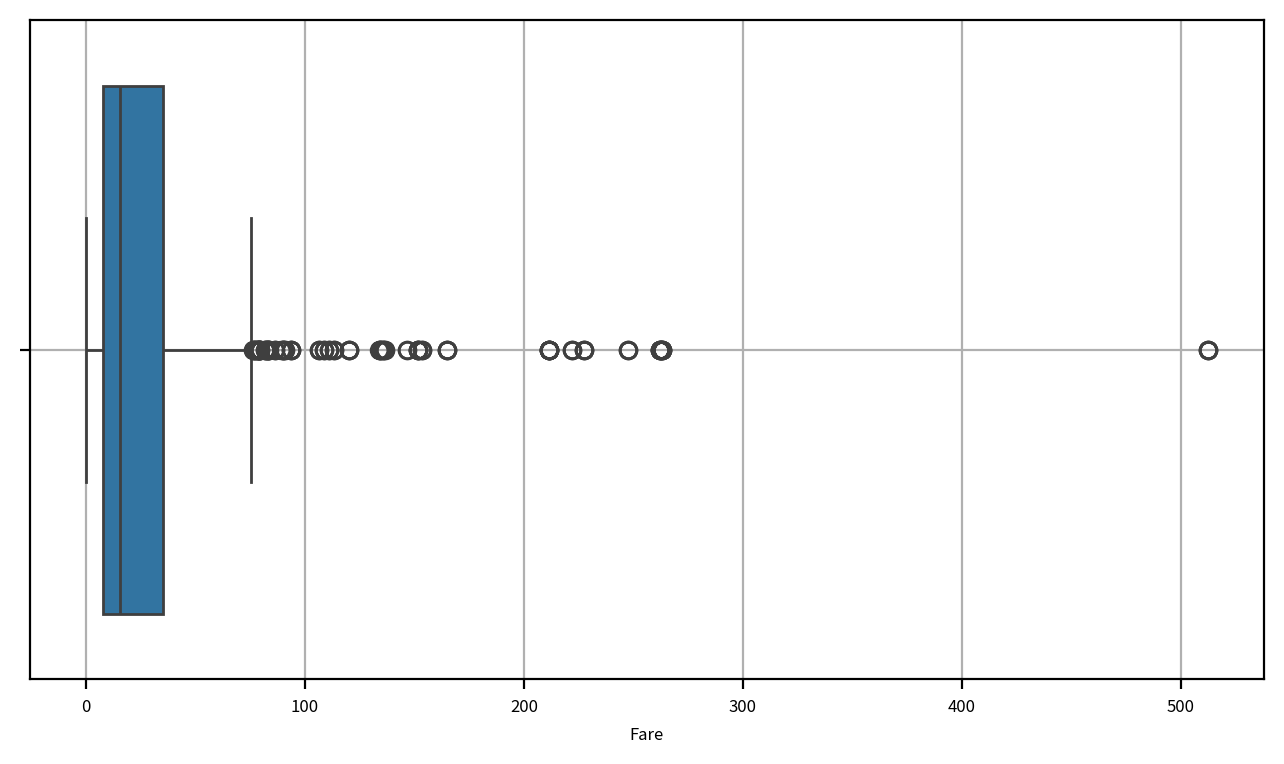

In [635]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df1, x='Fare')

# 3. 그래프 꾸미기
ax.grid(True)

# 4. 출력
plt.tight_layout()
plt.show()
plt.close()

In [636]:
# Age가 1보다 작거나 Fare가 0인 건 삭제
df1=df1.drop(index=df1[(df1['Age']<1) | (df1['Fare']==0)].index)

# Fare가 500이 넘는 건에 대하여 300이하 최대치로 변경
df1.loc[df1['Fare']>500,'Fare']=df1[df1['Fare']<300]['Fare'].max()

# Cabin 변수를 파생 범주로 변경
df1['Cabin_TF']=df1['Cabin'].isna()
df1=df1.drop(columns=['Cabin'])

# 중복행 검사
df1[df1.duplicated()==True].count()

# 가족단위 행 통일
df1['Family_size']=df1['SibSp']+df1['Parch']+1
df1=df1.drop(columns=['SibSp','Parch'])

## 🎯미션2. survived 분포 시각화

In [637]:
df=df1.copy()
df['Survived'].value_counts()

Survived
0    618
1    405
Name: count, dtype: int64

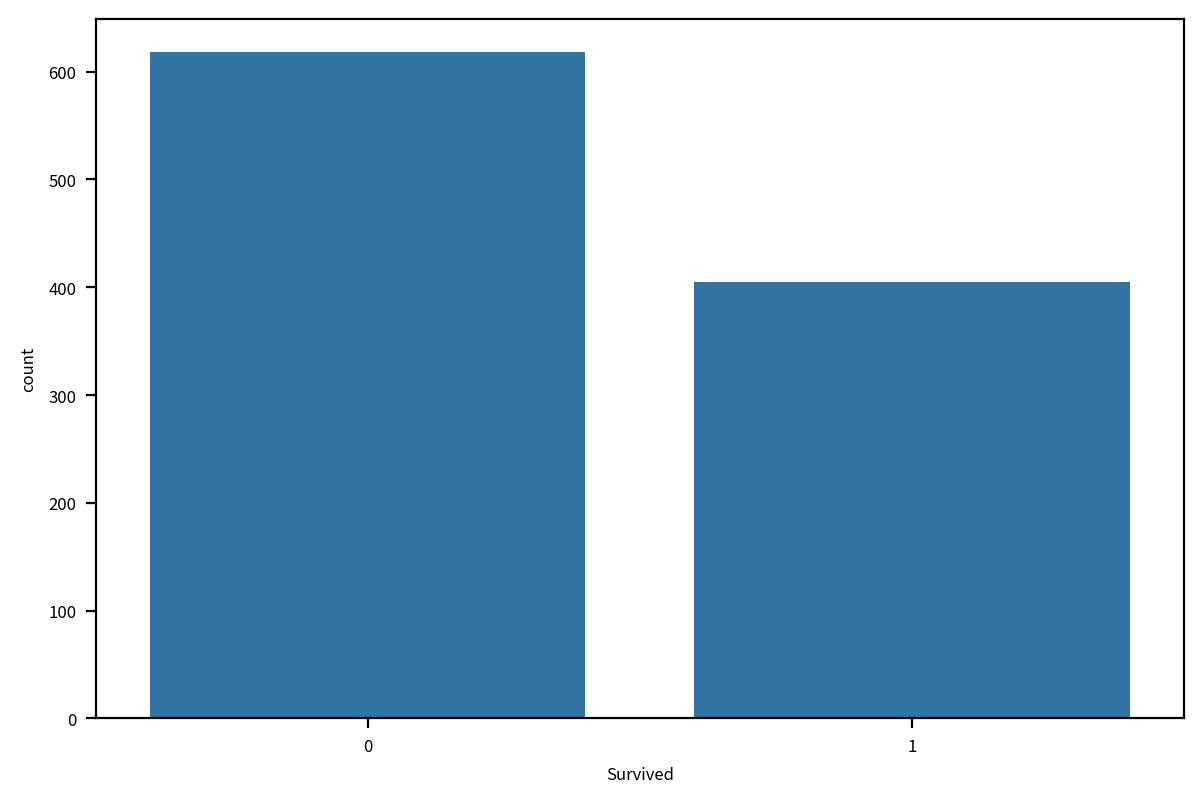

In [638]:
df=df1.copy()
width_px=1200
height_px=800
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig,ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.countplot(data=df, x='Survived')

plt.tight_layout()
plt.show()
plt.close()

## 🎯미션3. Sex에 따른 생존률 비교 및 시각화

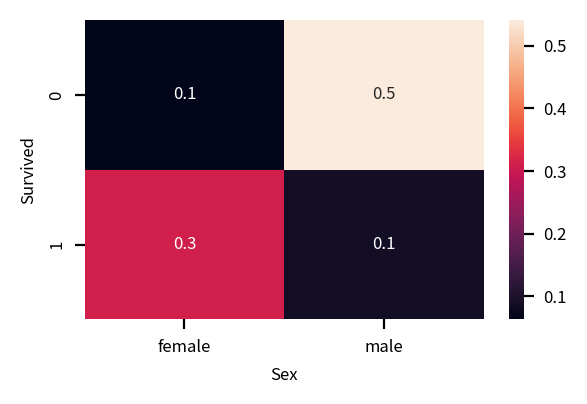

In [639]:
df=df1.copy()
cb=crosstab(index=df['Survived'], columns=df['Sex'], normalize=True)

# 1. 그래프 초기화
width_px=600
height_px=400
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.heatmap(data=cb, annot=True, fmt='0.1f')

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🎯미션4. Pclass에 따른 생존률 비교 및 시각화

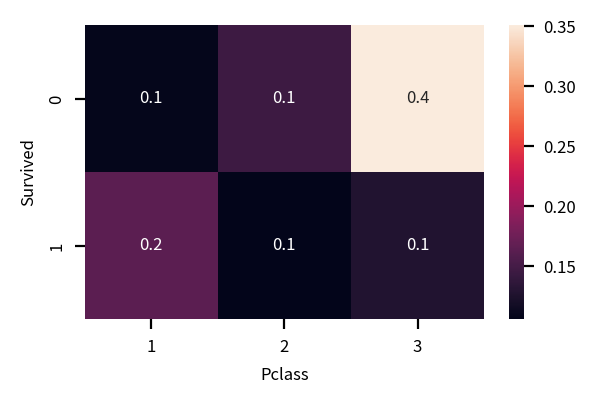

In [640]:
df=df1.copy()
cb=crosstab(index=df['Survived'], columns=df['Pclass'], normalize=True)

# 1. 그래프 초기화
width_px=600
height_px=400
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.heatmap(data=cb, annot=True, fmt='0.1f')

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🎯미션5. Age에 따른 생존률 비교 및 시각화

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


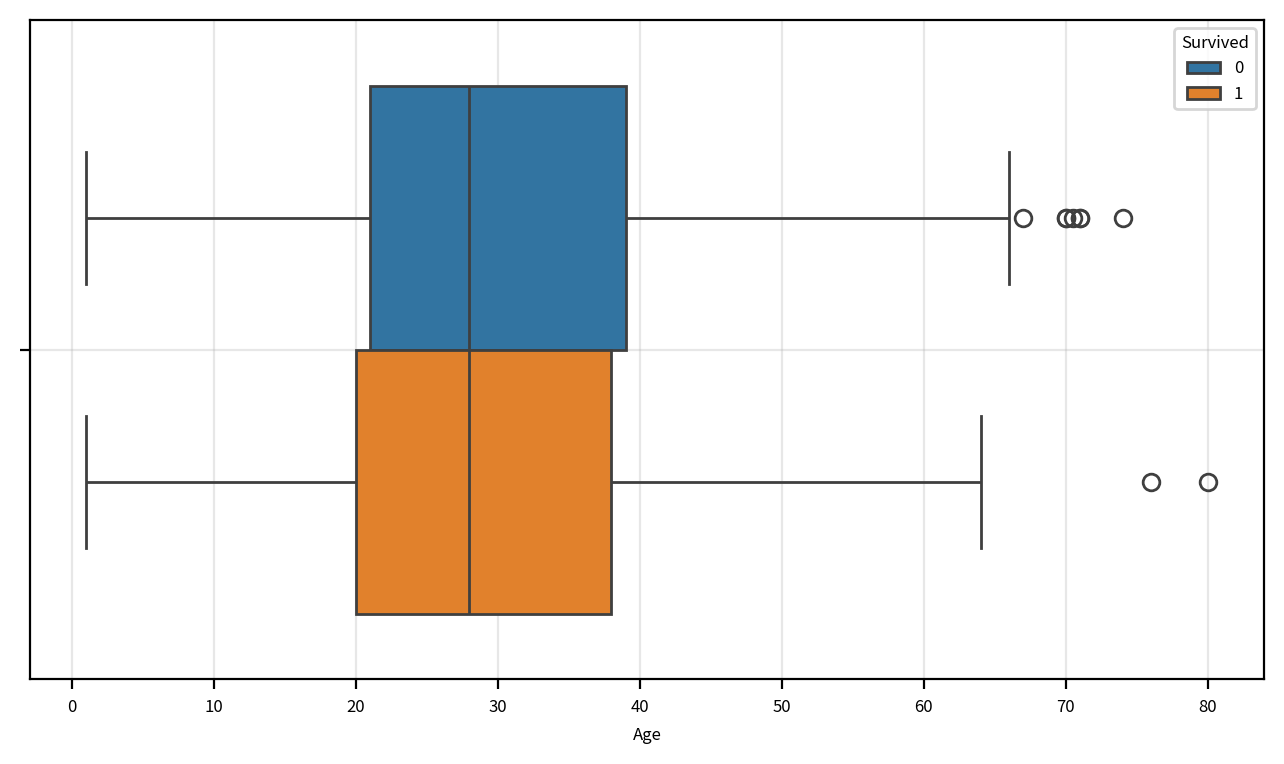

In [641]:
df=df1.copy()
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, x='Age', hue='Survived', orient='v')

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

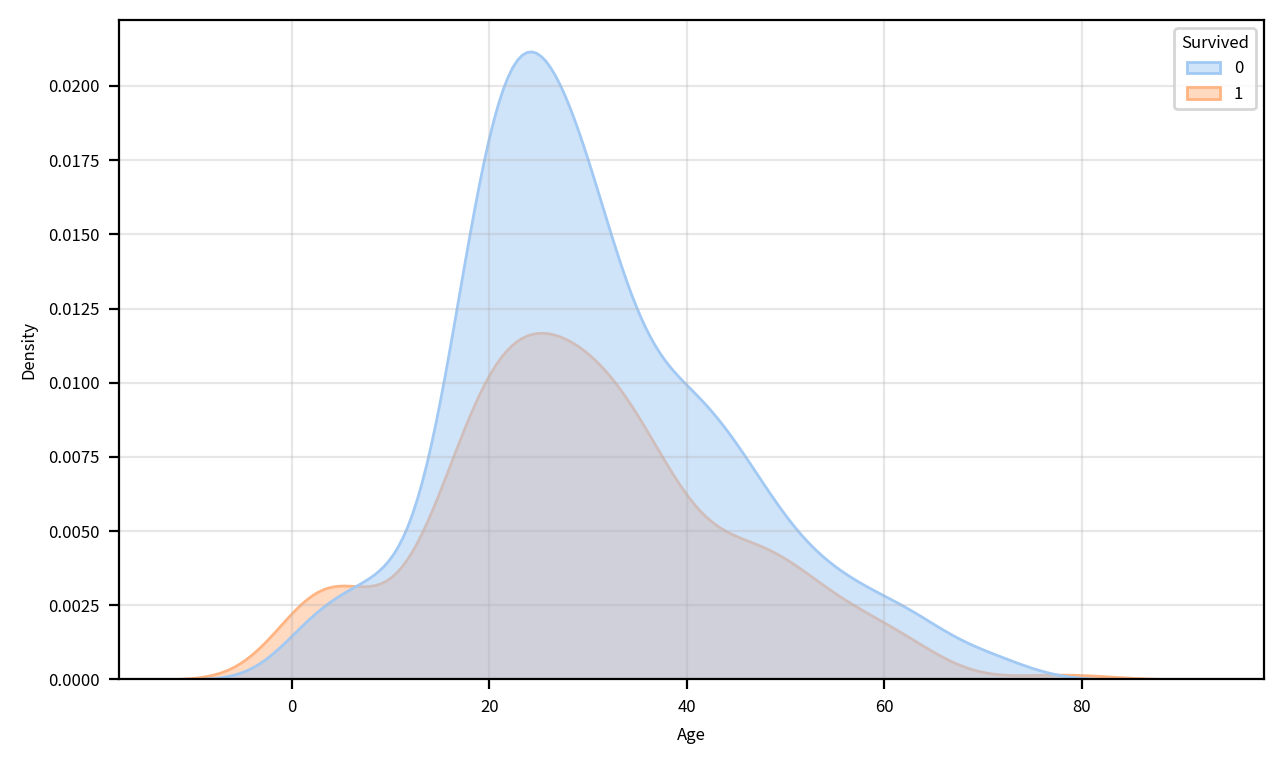

In [642]:
df=df1.copy()
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.kdeplot(data=df, x='Age', hue='Survived', fill=True, alpha=0.5, palette='pastel')

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🎯미션6. Sibsp, Parch에 따른 생존률 비교 및 시각화

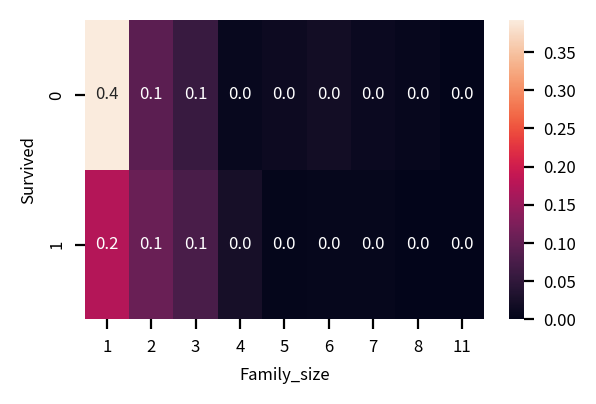

In [643]:
df=df1.copy()
cb=crosstab(index=df['Survived'], columns=df['Family_size'], normalize=True)

# 1. 그래프 초기화
width_px=600
height_px=400
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.heatmap(data=cb, annot=True, fmt='0.1f')

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🎯미션7. Embarked에 따른 생존률 비교 및 시각화

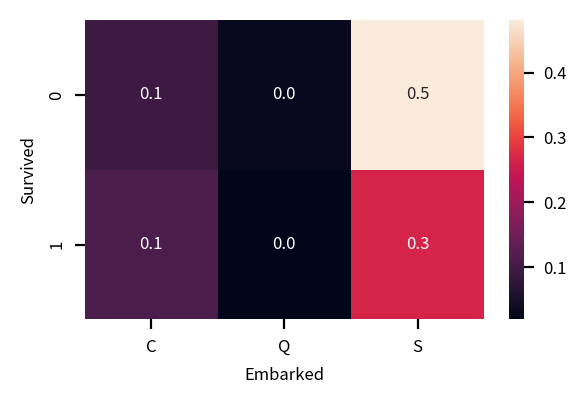

In [644]:
df=df1.copy()
cb=crosstab(index=df['Survived'], columns=df['Embarked'], normalize=True)

# 1. 그래프 초기화
width_px=600
height_px=400
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.heatmap(data=cb, annot=True, fmt='0.1f')

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🎯미션8. 연속형, 범주형 변수들과 Survived와의 관계 탐색

Cabin_TF와 Survived의 관계 시각화


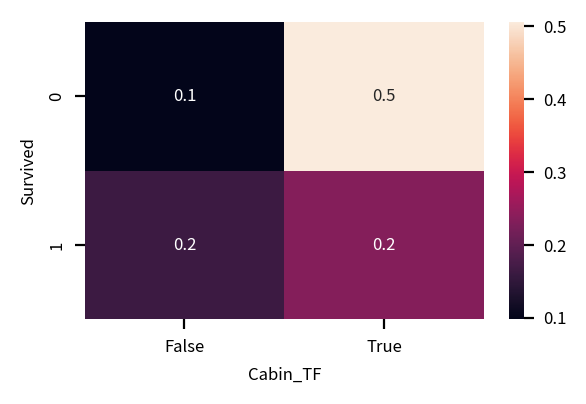

In [645]:
df=df1.copy()
print('='*50)
print('Cabin_TF와 Survived의 관계 시각화')
print('='*50)
cb=crosstab(index=df['Survived'], columns=df['Cabin_TF'], normalize=True)

# 1. 그래프 초기화
width_px=600
height_px=400
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.heatmap(data=cb, annot=True, fmt='0.1f')

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

Cabin_TF와 Fare의 관계 시각화


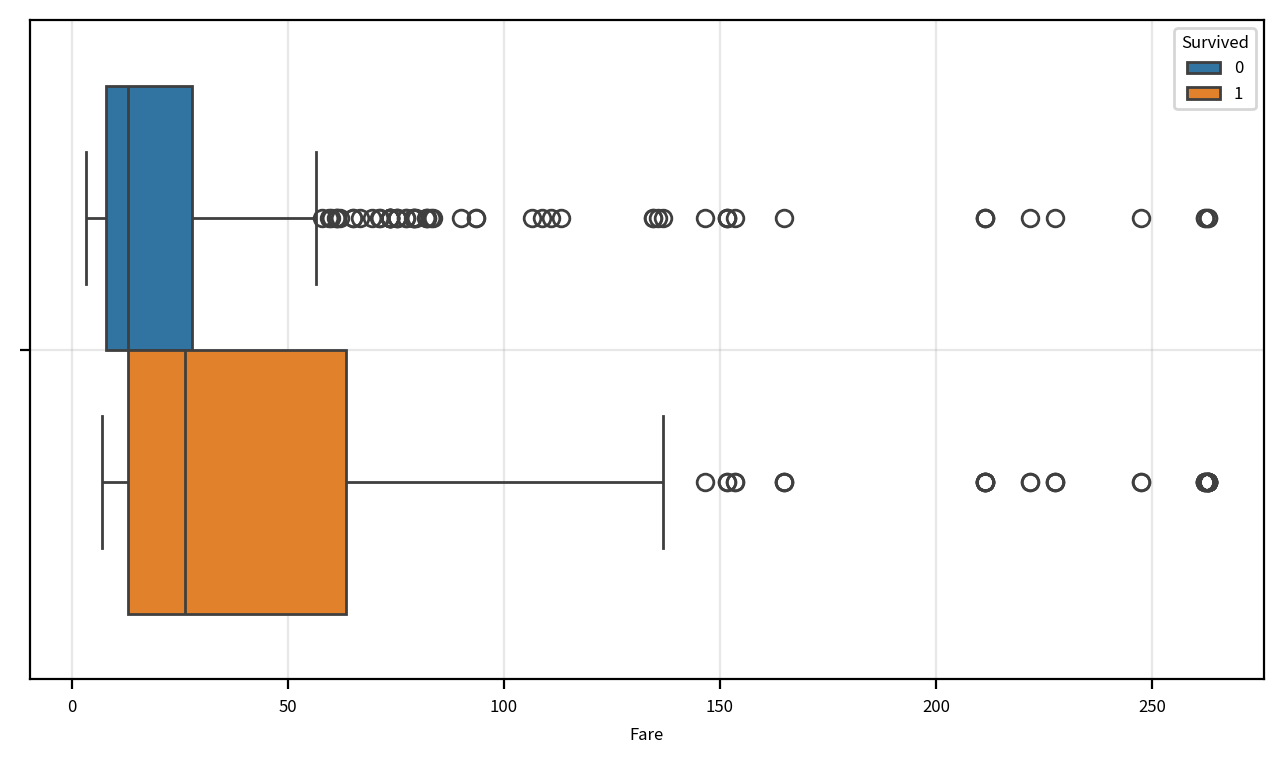

In [646]:
df=df1.copy()
print('='*50)
print('Cabin_TF와 Fare의 관계 시각화')
print('='*50)

# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, x='Fare', hue='Survived')

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

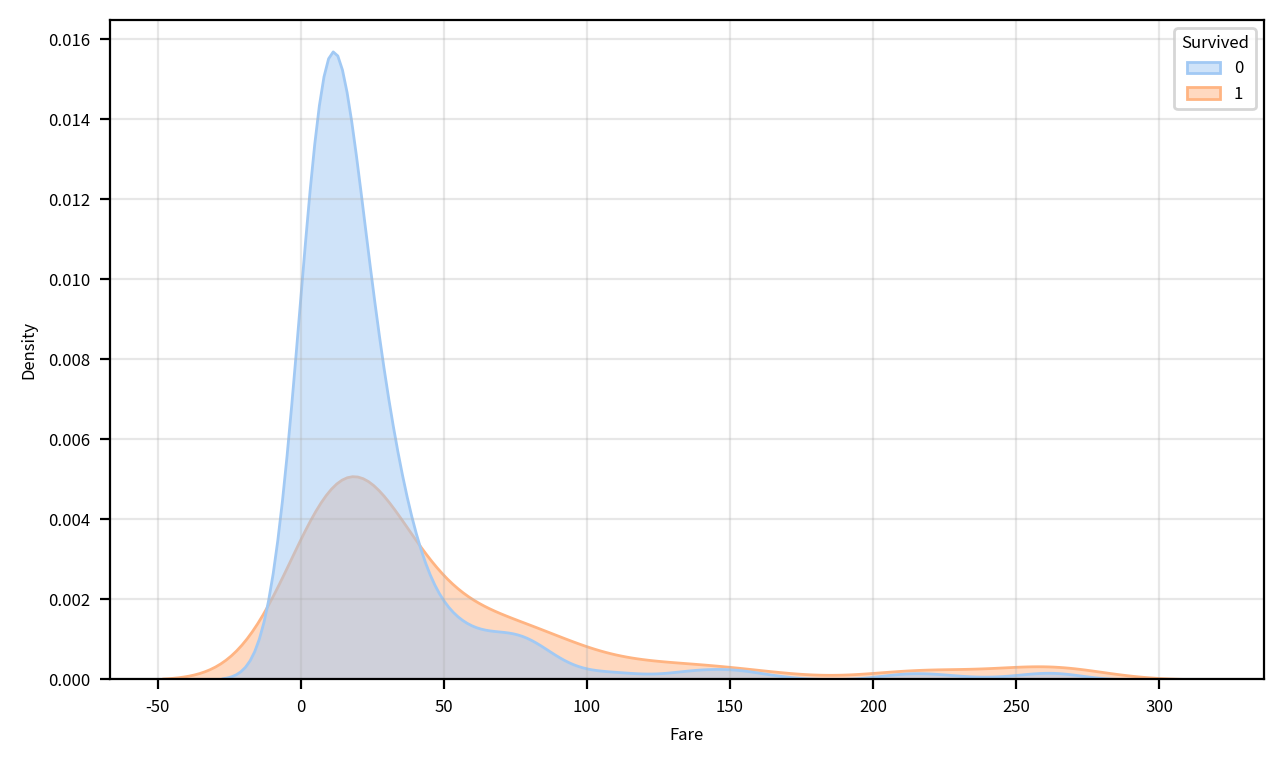

In [647]:
df=df1.copy()
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.kdeplot(data=df, x='Fare', hue='Survived', fill=True, alpha=0.5, palette='pastel')

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

📊 다중 선형 회귀
                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     36.93
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           3.28e-16
Time:                        17:59:51   Log-Likelihood:                -684.06
No. Observations:                1023   AIC:                             1374.
Df Residuals:                    1020   BIC:                             1389.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3929      0.035     11.1

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,Survived,Age,-0.0030,0.001,-0.086414,-2.806**,0.005,0.642634,1.556096
1,Survived,Fare,0.0026,0.000,0.262085,8.509***,0.000,0.642634,1.556096


Survived에 대하여 Age,Fare로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(2,1020)=36.93, p <= 0.05).
📕 선형성 검정
RESET F-statistic: 23.9237
p-value: 0.0000
선형성/기능형 위배 가능성이 있음 (5% 유의수준)


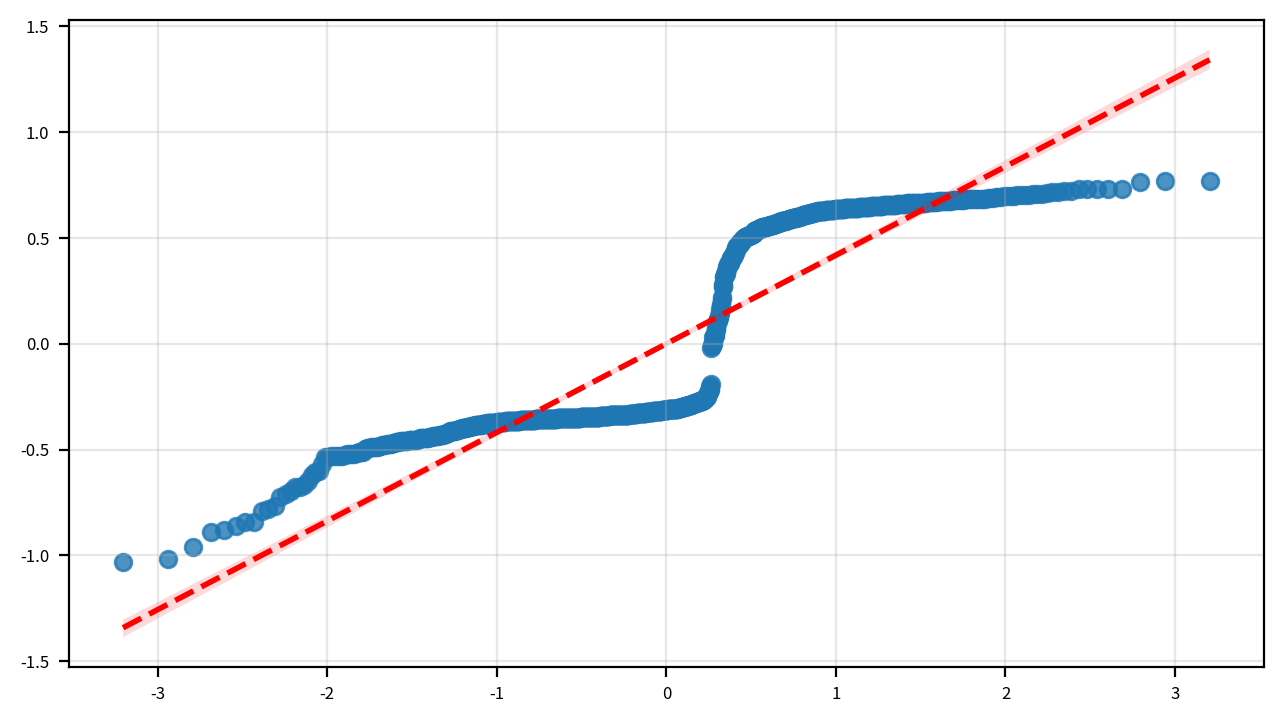

루트 1MSE 구간에 포함된 잔차 비율: 3.03%
루트 2MSE 구간에 포함된 잔차 비율: 58.65%
루트 3MSE 구간에 포함된 잔차 비율: 92.96%


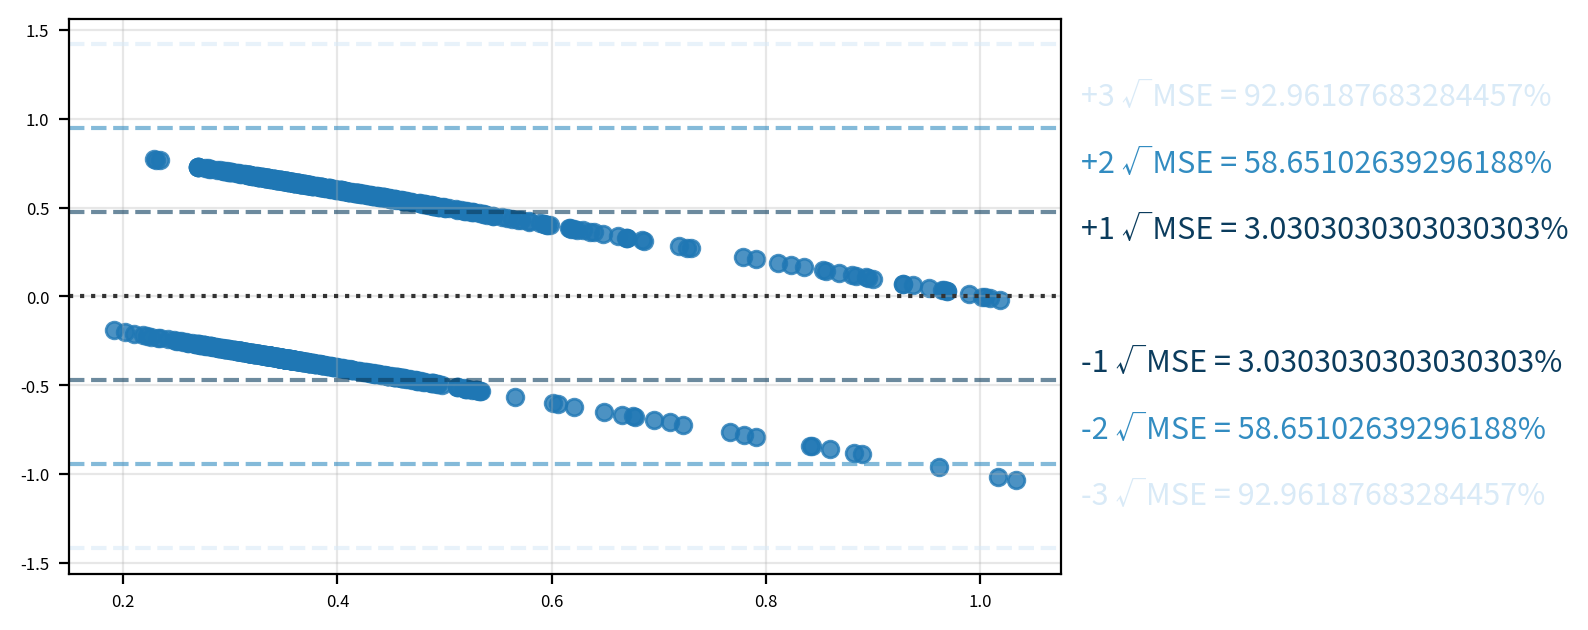

🎯 잔차의 정규성, 등분산성, 독립성 검정
Shapiro-Wilk statistic: 0.7813, p-value: 0.0000
정규성 가정 위배 가능성이 있음 (5% 유의수준)
Breusch-Pagan statistic: 4.990, p-value = 0.007
이분산성 존재(등분산 아님)
Durbin-Watson=2.027
잔차는 독립성을 만족함 (자기상관 없음)
🎓 최종 결과 보고
Survived에 대하여 Age,Fare로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(2,1020)=36.93, p <= 0.05).
Age의 회귀계수는 -0.0030(p <= 0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.
Fare의 회귀계수는 0.0026(p <= 0.05)로, Survived에 대하여 유의미한 예측변인인 것으로 나타났다.


In [648]:
df=df1.copy()
# 데이터 입력
yname='Survived'
df=df[['Survived','Age','Fare']]

# 패키지 참조
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr, probplot, shapiro, kstest, anderson
from statsmodels.formula.api import ols
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 다중선형회귀
x=df.drop(yname, axis=1)
y=df[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl=fit.summary()
print('='*50)
print('📊 다중 선형 회귀')
print('='*50)
print(tbl)

def ols_report(tbl, data):
    xnames=[n for n in fit.model.exog_names if n!='const']
    indi_df=data.filter(xnames)
    variables=[]
    for i, v in enumerate(tbl.tables[1].data):
        name=v[0].strip()
        if name not in xnames:
            continue
        j=list(indi_df.columns).index(name)
        vif=variance_inflation_factor(indi_df,j)

        p=float(v[4].strip())
        stars=lambda p: (
            '***' if p<0.001 else
            '**' if p<0.01 else
            '*' if p<0.05 else
            ''
        )

        variables.append({
            '종속변수':yname,
            '독립변수':name,
            'B':v[1].strip(),
            '표준오차':v[2].strip(),
            'Beta':float(fit.params[name])*(data[name].std(ddof=1)/data[yname].std(ddof=1)),
            't':'%s%s'%(v[3].strip(), stars(p)),
            'p-value':p,
            '공차':1/vif,
            'vif':vif
        })

    rdf=DataFrame(variables)

    result_dict={}
    for i in [0,2]:
        for item in tbl.tables[i].data:
            n=len(item)
            for j in range(0, n, 2):
                key=item[j].strip()[:-1]
                value=item[j+1].strip()
                if not key or not value:
                    continue
                result_dict[key]=value
    
    result_report=f'R({result_dict['R-squared']}), R²({result_dict['Adj. R-squared']}), F({result_dict['F-statistic']}), 유의확률({result_dict['Prob (F-statistic)']}), Durbin-Watson({result_dict['Durbin-Watson']})'

    tpl='%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s)=%s, p %s 0.05).'
    model_report=tpl%(
        rdf['종속변수'][0],
        ','.join(list(rdf['독립변수'])),
        '유의하다' if float(result_dict['Prob (F-statistic)'])<=0.05 else '유의하지 않다',
        result_dict['Df Model'],
        result_dict['Df Residuals'],
        result_dict['F-statistic'],
        '<=' if float(result_dict['Prob (F-statistic)'])<=0.05 else '>'
    )

    variable_reports=[]
    s='%s의 회귀계수는 %s(p %s 0.05)로, %s에 대하여 %s 예측변인인 것으로 나타났다.'

    for i in rdf.index:
        row=rdf.iloc[i]
        variable_reports.append(s%(row['독립변수'],
                                   row['B'],
                                   '<=' if float(row['p-value'])<0.05 else '>',
                                   row['종속변수'],
                                   '유의미한' if float(row['p-value'])<0.05 else '유의하지 않은'))
        
    return rdf, result_report, model_report, variable_reports

while True:
    rdf, r, m, v=ols_report(tbl, df)
    if rdf['vif'].max()>=10:
        df=df.drop(rdf[rdf['vif']==rdf['vif'].max()]['독립변수'], axis=1)
        x=df.drop(yname, axis=1)
        y=df[yname]
        x_input=sm.add_constant(x)
        fit=sm.OLS(y, x_input).fit()
        tbl=fit.summary()
    else:
        break

# p-value 무효값 제외
xnames=list(rdf[rdf['p-value']>0.05]['독립변수'])
df=df.drop(xnames, axis=1)
x=df.drop(yname, axis=1)
y=df[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl=fit.summary()
rdf, r, m, v=ols_report(tbl, df)
print('='*50)
print('✅ 분석 결과')
print('='*50)
display(rdf)
print(m)

# 잔차 검정
print('='*50)
print('📕 선형성 검정')
print('='*50)
reset_res=linear_reset(fit, power=2, use_f=True)
print(f'RESET F-statistic: {reset_res.fvalue:.4f}')
print(f'p-value: {reset_res.pvalue:.4f}')
if reset_res.pvalue<0.05:
    print('선형성/기능형 위배 가능성이 있음 (5% 유의수준)')
else:
    print('선형성 가정 위배 근거 없음 (5% 유의수준)')

(x,y),_=probplot(fit.resid)
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.regplot(x=x, y=y, line_kws={'color':'red', 'linestyle':'--', 'linewidth':2})
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

r=fit.resid
mse_sq=fit.mse_resid
mse_root=np.sqrt(mse_sq)
colors=['#0B3C5D', '#328CC1', '#D9EAF7']
r1=r[(r>-mse_sq)&(r<mse_sq)].count()/r.count()*100
r2=r[(r>-2*mse_sq)&(r<2*mse_sq)].count()/r.count()*100
r3=r[(r>-3*mse_sq)&(r<3*mse_sq)].count()/r.count()*100
mse_r=[r1,r2,r3]
print(f'루트 1MSE 구간에 포함된 잔차 비율: {r1:.2f}%')
print(f'루트 2MSE 구간에 포함된 잔차 비율: {r2:.2f}%')
print(f'루트 3MSE 구간에 포함된 잔차 비율: {r3:.2f}%')
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.residplot(x=fit.fittedvalues, y=fit.resid)
ax.grid(True, alpha=0.3)
for i, c in enumerate(colors):
    k=i+1
    y_pos=k*mse_root
    ax.axhline(y=y_pos, color=c, linestyle='--', alpha=0.6)
    ax.axhline(y=-y_pos, color=c, linestyle='--', alpha=0.6)
    ax.text(x=1.02, y=0.5+0.12*k,
            s=f'+{k} √MSE = {mse_r[i]}%',
            transform=ax.transAxes,
            ha='left', va='center', fontsize=11, color=c)
    ax.text(x=1.02, y=0.5-0.12*k,
            s=f'-{k} √MSE = {mse_r[i]}%',
            transform=ax.transAxes,
            ha='left', va='center', fontsize=11, color=c)
plt.show()
plt.close()

# 잔차의 정규성, 등분산성, 독립성 검정
print('='*50)
print('🎯 잔차의 정규성, 등분산성, 독립성 검정')
print('='*50)
if len(origin)<5000:
    method='Shapiro-Wilk'
    s, p=shapiro(fit.resid)
    print(f'{method} statistic: {s:.4f}, p-value: {p:.4f}')
    violated=p<0.05
else:
    method='Anderson-Darling'
    ad_res=anderson(fit.resid, dist='norm')
    crit_levels=ad_res.significance_level.tolist()
    crit_values=ad_res.critical_values.tolist()
    crit_5=crit_values[crit_levels.index(5.0)] if 5.0 in crit_levels else None
    print(f'{method} statistic: {ad_res.statistic:.4f}, 5% 임계값: {crit_5:.4f}')
    violated=crit_5 is not None and ad_res.statistic>crit_5
print('정규성 가정 위배 가능성이 있음 (5% 유의수준)' if violated else '정규성 가정 위배 근거 없음 (5% 유의수준)')

names=['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
bp_test=het_breuschpagan(fit.resid, fit.model.exog)
bp=DataFrame(bp_test, index=names, columns=['value'])
p_bp=bp.loc['F p-value', 'value']
print(f'Breusch-Pagan statistic: {bp.loc['F Statistic', 'value']:.3f}, p-value = {p_bp:.3f}')
print(f'{'이분산성 존재(등분산 아님)' if p_bp<=0.05 else '등분산성 만족'}')

dw=durbin_watson(fit.resid)
if 1.5<=dw<=2.5:
    interpretation='잔차는 독립성을 만족함 (자기상관 없음)'
elif dw<1.5:
    interpretation='잔차에 양(+)의 자기상관이 존재할 가능성 있음 (독립성 위반)'
else:
    interpretation='잔차에 음(-)의 자기상관이 존재할 가능성 있음 (독립성 위반)'
print(f'Durbin-Watson={dw:.3f}\n{interpretation}')

# 최종 결과 보고
print('='*50)
print('🎓 최종 결과 보고')
print('='*50)
print(m)
print('\n'.join(v))

## 🎯미션9. 상관관계와 인과관계의 불일치성 증명

## 🎯미션10. Survived를 종속변수로 하는 로지스틱 회귀모형 설계

In [649]:
# 분석에 필요없는 변수 제거
df=df1.copy()
df=df.drop(columns=['PassengerId','Name','Ticket'])
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_TF,Family_size
0,0,3,male,22.0,7.2500,S,True,2
1,1,1,female,38.0,71.2833,C,False,2
2,1,3,female,26.0,7.9250,S,True,1
3,1,1,female,35.0,53.1000,S,False,2
4,0,3,male,35.0,8.0500,S,True,1
...,...,...,...,...,...,...,...,...
1300,1,3,female,3.0,13.7750,S,True,3
1302,1,1,female,37.0,90.0000,Q,False,2
1303,1,3,female,28.0,7.7750,S,True,1
1305,1,1,female,39.0,108.9000,C,False,1


데이터 전처리
Sex_0 = male
Sex_1 = female
Embarked_0 = S
Embarked_1 = C
Embarked_2 = Q
Cabin_TF_0 = True
Cabin_TF_1 = False
Optimization terminated successfully.
         Current function value: 0.369681
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                 1023
Model:                          Logit   Df Residuals:                     1014
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.4493
Time:                        17:59:51   Log-Likelihood:                -378.18
converged:                       True   LL-Null:                       -686.75
Covariance Type:            nonrobust   LLR p-value:                4.837e-128
                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specif city, TNR)",RAS(auc score),F1_score
0,0.449316,0.855327,0.842667,0.780247,0.095469,0.904531,0.842389,0.810256


,종속변수,독립변수,B(β),표준오차,z,p-value,OR,CI_lower,CI_upper,VIF
0,Survived,Pclass,-0.8096,0.189,-4.294***,0.000,0.445036,0.307266,0.644578,4.971428
1,Survived,Age,-0.0295,0.008,-3.882***,0.000,0.970931,0.955825,0.986275,4.440557
2,Survived,Fare,-0.0004,0.003,-0.149,0.881,0.999600,0.993740,1.005495,2.770408
3,Survived,Family_size,-0.2209,0.074,-2.984**,0.003,0.801797,0.693544,0.926946,3.275010
4,Survived,Sex_1,3.7625,0.215,17.535***,0.000,43.055931,28.250185,65.621278,1.699147
5,Survived,Embarked_1,0.1642,0.246,0.666,0.505,1.178450,0.727632,1.908581,1.466928
6,Survived,Embarked_2,-0.0883,0.451,-0.196,0.845,0.915486,0.378227,2.215903,1.090240
7,Survived,Cabin_TF_1,0.7367,0.306,2.411*,0.016,2.089030,1.146759,3.805548,2.414000


'Pseudo R²(McFadden) = 0.449, LLR X²(8) = 617.137, p-value = 0.0000, Accuracy = 0.855, AUC = 0.842'

'Survived에 대하여 Pclass, Age, Fare, Family_size, Sex_1, Embarked_1, Embarked_2, Cabin_TF_1로 예측하는 로지스틱 회귀분석을 실시한 결과, 모형은 통계적으로 유의(X²(8) = 617.137, p ≤ 0.05)하였다.'

Pclass의 오즈비는 0.445(p ≤ 0.05)로, Survived 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Age의 오즈비는 0.971(p ≤ 0.05)로, Survived 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Fare의 오즈비는 1.000(p > 0.05)로, Survived 발생 odds에 유의하지 않은 영향을 미치는 것으로 나타났다.
Family_size의 오즈비는 0.802(p ≤ 0.05)로, Survived 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Sex_1의 오즈비는 43.056(p ≤ 0.05)로, Survived 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Embarked_1의 오즈비는 1.178(p > 0.05)로, Survived 발생 odds에 유의하지 않은 영향을 미치는 것으로 나타났다.
Embarked_2의 오즈비는 0.915(p > 0.05)로, Survived 발생 odds에 유의하지 않은 영향을 미치는 것으로 나타났다.
Cabin_TF_1의 오즈비는 2.089(p ≤ 0.05)로, Survived 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.


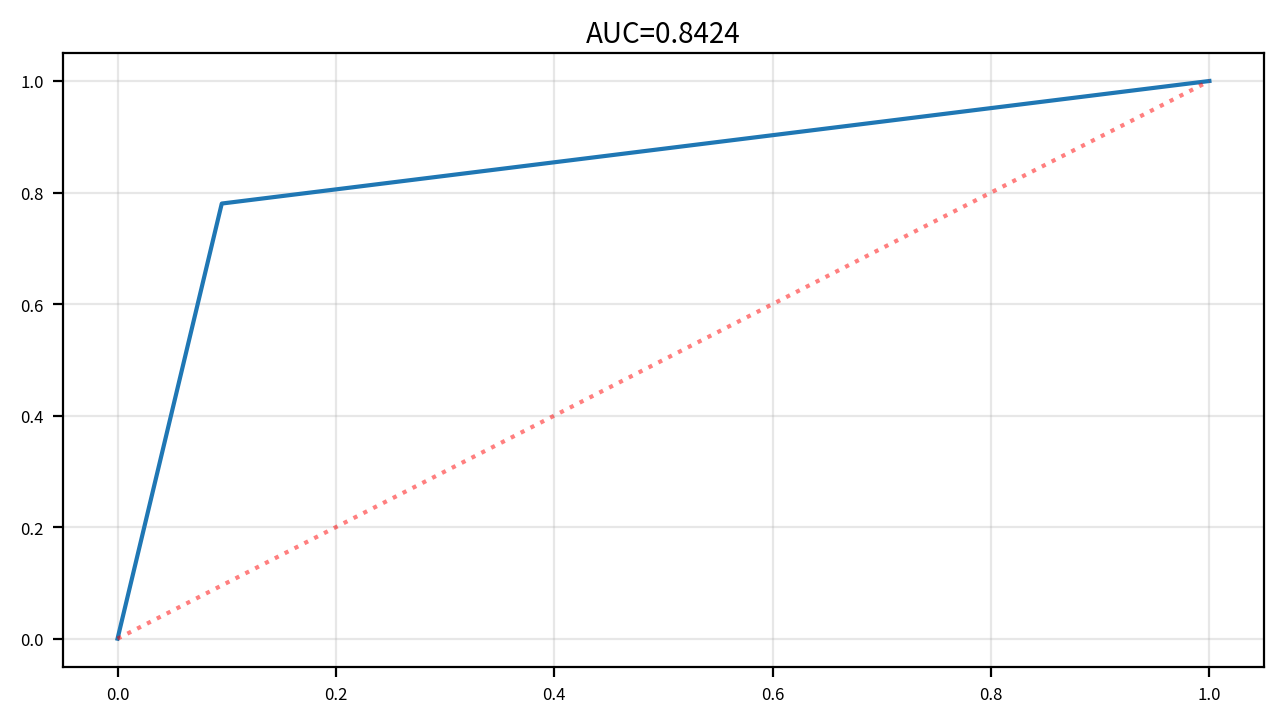

In [650]:
# 패키지 참조
from pandas import DataFrame, get_dummies
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 데이터 전처리             # 필요 시 사용
print('='*50)
print('데이터 전처리')
print('='*50)
mydata=['Sex','Embarked','Cabin_TF']              # 명목형 변수 전처리
for j in mydata:
    new_dict={}
    my_unique=df[j].unique()
    for i, v in enumerate(my_unique):
        new_dict.update({v:i})
        print(f'{j}_{i} = {v}')
    df[j]=df[j].map(new_dict)
    df=get_dummies(df, columns=[j], dtype='int', drop_first=True)

# 데이터 입력
yname='Survived'          # 범주형 종속 변수 (합/불 등)
my_log=False            # 로그변환 필요시 True로 변경 
# df=origin.copy()
x=df.drop(yname, axis=1)
y=df[yname]
if my_log:
    log_vars=x.columns
    for v in log_vars:
        df[f'log_{v}']=np.log1p(df[v])
    df.drop(columns=log_vars, inplace=True)
x_input=sm.add_constant(df.drop(yname, axis=1))
fit=sm.Logit(y, x_input).fit()
tbl1=fit.summary()
print(tbl1)

# 결과보고 함수 정의
def logit_report(fit, data, threshold=0.5):
    yname=fit.model.endog_names
    y_true=data[yname]
    y_pred=fit.predict(fit.model.exog)
    y_pred_fix=(y_pred>=threshold).astype(int)

    cm=confusion_matrix(y_true, y_pred_fix)
    tn, fp, fn, tp=cm.ravel()

    acc=accuracy_score(y_true, y_pred_fix)
    pre=precision_score(y_true, y_pred_fix)
    tpr=recall_score(y_true, y_pred_fix)
    fpr=fp/(fp+tn)
    tnr=1-fpr
    f1=f1_score(y_true, y_pred_fix)
    ras=roc_auc_score(y_true, y_pred_fix)

    cdf=DataFrame({
        '설명력(Pseudo-Rsqe)':[fit.prsquared],
        '정확도(Accuracy)':[acc],
        '정밀도(Precision)':[pre],
        '재현율(Recall, TPR)':[tpr],
        '위양성율(Fallout, FPR)':[fpr],
        '특이성(Specif city, TNR)':[tnr],
        'RAS(auc score)':[ras],
        'F1_score':[f1]
    })

    tbl=fit.summary()
    xnames=[n for n in fit.model.exog_names if n!='const']
    x=data[xnames]
    variables=[]
    vif_dict={
        col:variance_inflation_factor(x.values, i)
        for i, col in enumerate(x.columns)
    }

    for v in tbl.tables[1].data:
        name=v[0].strip()
        if name not in xnames:
            continue
        beta=float(v[1])
        se=float(v[2])
        z=float(v[3])
        p=float(v[4])

        or_val=np.exp(beta)
        ci_low=np.exp(beta-1.96*se)
        ci_high=np.exp(beta+1.96*se)

        stars=(
            '***' if p<0.001 else
            '**' if p<0.01 else
            '*' if p<0.05 else
            ''
        )

        variables.append({
            '종속변수':yname,
            '독립변수':name,
            'B(β)':beta,
            '표준오차':se,
            'z':f'{z:.3f}{stars}',
            'p-value':p,
            'OR':or_val,
            'CI_lower':ci_low,
            'CI_upper':ci_high,
            'VIF':vif_dict.get(name, np.nan)
        })
    
    rdf=DataFrame(variables)

    result_report=(
        f'Pseudo R²(McFadden) = {fit.prsquared:.3f}, '
        f'LLR X²({int(fit.df_model)}) = {fit.llr:.3f}, '
        f'p-value = {fit.llr_pvalue:.4f}, '
        f'Accuracy = {acc:.3f}, '
        f'AUC = {ras:.3f}'
    )

    tpl=(
        '%s에 대하여 %s로 예측하는 로지스틱 회귀분석을 실시한 결과, '
        '모형은 통계적으로 %s(X²(%s) = %.3f, p %s 0.05)하였다.'
    )

    model_report=tpl%(
        yname,
        ', '.join(xnames),
        '유의' if fit.llr_pvalue<=0.05 else '유의하지 않음',
        int(fit.df_model),
        fit.llr,
        '≤' if fit.llr_pvalue<=0.05 else '>'
    )

    variable_reports=[]

    s=(
        '%s의 오즈비는 %.3f(p %s 0.05)로, '
        '%s 발생 odds에 %s 영향을 미치는 것으로 나타났다.'
    )

    for _, row in rdf.iterrows():
        variable_reports.append(
            s%(
                row['독립변수'],
                row['OR'],
                '≤' if row['p-value']<=0.05 else '>',
                row['종속변수'],
                '유의미한' if row['p-value']<=0.05 else '유의하지 않은'
            )
        )
    
    return cdf, rdf, result_report, model_report, variable_reports

# 분석결과 보고
cdf, rdf, r, m, v=logit_report(fit, df)
display(cdf)
display(rdf)
display(r)
display(m)
for i in v:
    print(i)

# AUC 시각화
y_true=df[yname]
y_prob=fit.predict(fit.model.exog)
y_pred=(y_prob>=0.5).astype(int)
ras=roc_auc_score(y_true, y_pred)
roc_fpr, roc_tpr, thresholds=roc_curve(y_true, y_pred)
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.lineplot(x=roc_fpr, y=roc_tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
ax.grid(True, alpha=0.3)
ax.set_title(f'AUC={ras:.4f}', fontsize=10, pad=4)
plt.tight_layout()
plt.show()
plt.close()

## 🎯미션12. 예시 데이터를 이용하여 이야기 서술

🤧 예시 데이터 세팅

성별만 다르게 설정

나머지 : Pclass(3), Age(29), Fare(150), Family_size(4), Embarked_1(1), Embarked_2(0), Cabin_TF_1(0)

In [651]:
# 데이터 입력을 통한 예측
print('='*50)
print('데이터 예측 (남성)')
print('='*50)
myinput=[]
for i, v in enumerate(x.columns):
    myinput.append(input(f'{x.columns[i]}를(을) 입력해주세요.'))
mydict={}
for i in range(0,len(x.columns)):
    mydict.update({x.columns[i]:float(myinput[i].strip())})
x_new=DataFrame([mydict])
x_new_input=sm.add_constant(x_new, has_constant='add')
myresult=fit.predict(x_new_input)
print(myresult)

# 데이터 입력을 통한 예측
print('='*50)
print('데이터 예측 (여성)')
print('='*50)
myinput=[]
for i, v in enumerate(x.columns):
    myinput.append(input(f'{x.columns[i]}를(을) 입력해주세요.'))
mydict={}
for i in range(0,len(x.columns)):
    mydict.update({x.columns[i]:float(myinput[i].strip())})
x_new=DataFrame([mydict])
x_new_input=sm.add_constant(x_new, has_constant='add')
myresult=fit.predict(x_new_input)
print(myresult)

데이터 예측 (남성)
0    0.039394
dtype: float64
데이터 예측 (여성)
0    0.638434
dtype: float64
